In [2]:
import pandas as pd
from typing import List, Dict
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("restaurantes_con_distrito_barrio.csv", index_col = 0)
df

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO,NOMBRE_BARRIO
id,,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro,Sol
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro,Justicia
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro,Universidad
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro,Embajadores
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN,NaN


In [ ]:
import pandas as pd
from typing import List, Dict

tipos_restaurantes: List[str] = [
    "Korean", "African", "American", "Asian", "Australian", "Brazilian", "British", 
    "Caribbean", "Chinese", "European", "French", "Fusion", "German", "Indian", 
    "International", "Italian", "Japanese", "Latin", "Mediterranean", "Mexican", 
    "Middle Eastern", "Spanish", "Taiwanese", "Thai", "Vietnamese", "Western"
]

total_tipos: Dict[str, Dict[str, float]] = {}
transform_prices = {
    "Barato": 1,
    "Moderado": 2,
    "Caro": 3,
    "No price range": 0
}
# Modificamos los precios para otorgarles un valor numérico

df = df.replace(transform_prices)

for tipo in tipos_restaurantes:
    filtro_tipo = df[df["Type of Restaurant"].str.contains(tipo, case=False, na=False)].copy()
    # Seleccionamos aquellos restaurantes que contengan en su lista de tipos, el tipo pedido
    
    conteo_distritos = filtro_tipo["NOMBRE_DISTRITO"].value_counts()
    # Contamos el número de veces que aparece cada distrito

    conteo_barrio = filtro_tipo["NOMBRE_BARRIO"].value_counts()
    # Contamos el número de veces que aparece cada barrio

    distrito_mas_frecuente = conteo_distritos.idxmax()
    barrio_mas_frecuente = conteo_barrio.idxmax()
    # Selección del distrito y del barrio que más aparece

    numero_tipo = len(filtro_tipo)
    numero_reviews = int(filtro_tipo["Number of Ratings"].sum())

    if numero_reviews > 0:
        distribucion = (filtro_tipo["Number of Ratings"] / numero_reviews) * filtro_tipo["Restaurant Rating"]
        media_ponderada = round(distribucion.sum(), 3)
    else:
        media_ponderada = 0

    valid_prices = filtro_tipo[filtro_tipo["Price Range"] != 0]["Price Range"]
    if len(valid_prices) > 0:
        media_precios = (round(valid_prices.sum() / len(valid_prices)))
    else:
        media_precios = 0

    total_tipos[tipo] = {
        "total": numero_tipo,
        "reviews": numero_reviews,
        "MP rating": media_ponderada,
        "Media precio": media_precios,
        "Distrito más frecuente": distrito_mas_frecuente,
        "Barrio más frecuente": barrio_mas_frecuente
    }

df_total_tipos = pd.DataFrame.from_dict(total_tipos)
transform = {
    1: "Barato",
    2: "Moderado",
    3: "Caro"
}

df_mod_media_precios = df_total_tipos.T[["Media precio"]].replace(transform)
df_mod_media_precios.T
df_transpose = df_total_tipos.T
df_transpose["Media Precios"] = df_mod_media_precios
df_def = df_transpose.drop(columns="Media precio")

df_def


,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
Korean,4,10,3.4,Centro,Palacio,Moderado
African,7,25,3.92,Centro,Embajadores,Moderado
American,85,1356,4.49,Centro,Universidad,Moderado
Asian,86,412,3.823,Centro,Embajadores,Moderado
Australian,2,18,3.806,Centro,Palacio,Moderado
Brazilian,8,35,4.571,Centro,Justicia,Moderado
British,1,0,0,Centro,Universidad,Moderado
Caribbean,3,5,3.2,Centro,Palacio,Barato
Chinese,19,246,3.803,Centro,Sol,Barato
European,124,1241,4.164,Centro,Embajadores,Moderado


In [4]:
total_reviews_ordenados = df_def.sort_values("reviews", ascending=False)
total_reviews_ordenados[:10]

,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
Spanish,227,4898,4.419,Centro,Embajadores,Moderado
International,101,2370,4.403,Centro,Embajadores,Moderado
Mediterranean,120,2351,4.397,Centro,Embajadores,Moderado
Western,80,1558,4.437,Centro,Universidad,Moderado
Fusion,61,1519,4.431,Centro,Universidad,Moderado
American,85,1356,4.49,Centro,Universidad,Moderado
European,124,1241,4.164,Centro,Embajadores,Moderado
Italian,86,1078,4.565,Centro,Embajadores,Moderado
Mexican,37,1006,4.572,Centro,Justicia,Moderado
Asian,86,412,3.823,Centro,Embajadores,Moderado


In [5]:
total_reviews_ordenados[-10:]

,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
African,7,25,3.92,Centro,Embajadores,Moderado
Indian,7,22,3.818,Centro,Embajadores,Moderado
French,6,19,3.211,Centro,Universidad,Barato
Australian,2,18,3.806,Centro,Palacio,Moderado
Taiwanese,1,13,3.5,Centro,Cortes,Barato
Korean,4,10,3.4,Centro,Palacio,Moderado
Caribbean,3,5,3.2,Centro,Palacio,Barato
Vietnamese,3,5,3.6,Centro,Embajadores,Moderado
German,2,1,4.0,Vicalvaro,Casco Histórico de Vicálvaro,Moderado
British,1,0,0,Centro,Universidad,Moderado


In [6]:
total_tipos_ordenados = df_def.sort_values("total", ascending=False)
total_tipos_ordenados[:10]


,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
Spanish,227,4898,4.419,Centro,Embajadores,Moderado
European,124,1241,4.164,Centro,Embajadores,Moderado
Mediterranean,120,2351,4.397,Centro,Embajadores,Moderado
International,101,2370,4.403,Centro,Embajadores,Moderado
Italian,86,1078,4.565,Centro,Embajadores,Moderado
Asian,86,412,3.823,Centro,Embajadores,Moderado
American,85,1356,4.49,Centro,Universidad,Moderado
Western,80,1558,4.437,Centro,Universidad,Moderado
Fusion,61,1519,4.431,Centro,Universidad,Moderado
Japanese,54,271,3.873,Centro,Justicia,Moderado


In [7]:
total_tipos_ordenados[-10:]


,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
African,7,25,3.92,Centro,Embajadores,Moderado
French,6,19,3.211,Centro,Universidad,Barato
Thai,5,26,3.5,Centro,Sol,Moderado
Korean,4,10,3.4,Centro,Palacio,Moderado
Caribbean,3,5,3.2,Centro,Palacio,Barato
Vietnamese,3,5,3.6,Centro,Embajadores,Moderado
German,2,1,4.0,Vicalvaro,Casco Histórico de Vicálvaro,Moderado
Australian,2,18,3.806,Centro,Palacio,Moderado
British,1,0,0,Centro,Universidad,Moderado
Taiwanese,1,13,3.5,Centro,Cortes,Barato


In [8]:
total_rating_ordenados = df_def.sort_values("MP rating", ascending=False)
total_rating_ordenados[:10]

,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
Middle Eastern,34,335,4.578,Centro,Universidad,Moderado
Mexican,37,1006,4.572,Centro,Justicia,Moderado
Brazilian,8,35,4.571,Centro,Justicia,Moderado
Italian,86,1078,4.565,Centro,Embajadores,Moderado
American,85,1356,4.49,Centro,Universidad,Moderado
Western,80,1558,4.437,Centro,Universidad,Moderado
Fusion,61,1519,4.431,Centro,Universidad,Moderado
Spanish,227,4898,4.419,Centro,Embajadores,Moderado
International,101,2370,4.403,Centro,Embajadores,Moderado
Mediterranean,120,2351,4.397,Centro,Embajadores,Moderado


In [9]:
total_rating_ordenados[-10:]

,total,reviews,MP rating,Distrito más frecuente,Barrio más frecuente,Media Precios
Indian,7,22,3.818,Centro,Embajadores,Moderado
Australian,2,18,3.806,Centro,Palacio,Moderado
Chinese,19,246,3.803,Centro,Sol,Barato
Vietnamese,3,5,3.6,Centro,Embajadores,Moderado
Taiwanese,1,13,3.5,Centro,Cortes,Barato
Thai,5,26,3.5,Centro,Sol,Moderado
Korean,4,10,3.4,Centro,Palacio,Moderado
French,6,19,3.211,Centro,Universidad,Barato
Caribbean,3,5,3.2,Centro,Palacio,Barato
British,1,0,0,Centro,Universidad,Moderado


<BarContainer object of 26 artists>

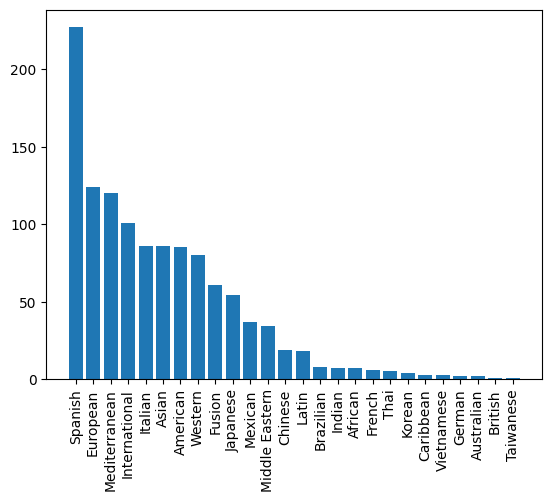

In [10]:
plt.xticks(rotation=90)
plt.bar(total_tipos_ordenados.index, total_tipos_ordenados["total"])


<BarContainer object of 7 artists>

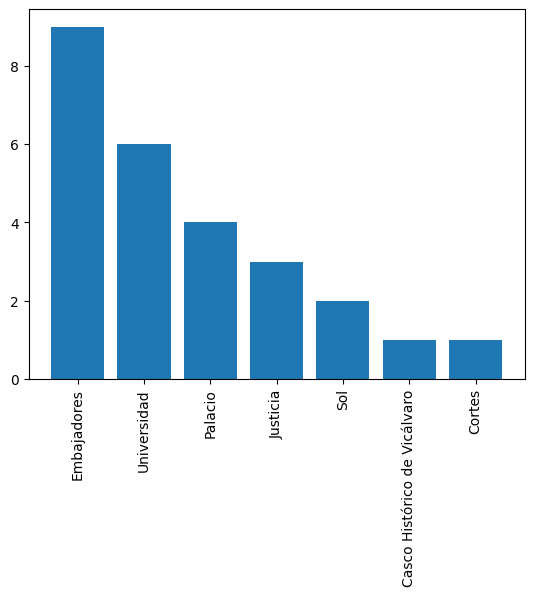

In [11]:
barrios = df_def["Barrio más frecuente"].value_counts()
plt.xticks(rotation=90)
plt.bar(barrios.index, barrios.values)

Text(0.5, 1.0, 'Total')

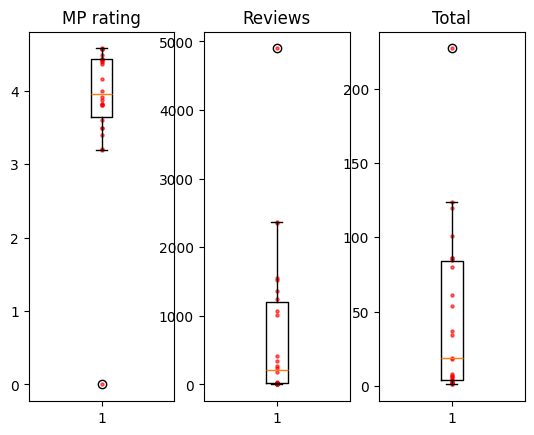

In [17]:
plt.subplot(1,3,1)
plt.boxplot(df_def["MP rating"])
plt.scatter(np.ones(len(df_def["MP rating"])), df_def["MP rating"], alpha=0.6, color='red', s=5)
plt.title("MP rating")
plt.subplot(1,3,2)
plt.boxplot(df_def["reviews"])
plt.scatter(np.ones(len(df_def["reviews"])), df_def["reviews"], alpha=0.6, color='red', s=5)
plt.title("Reviews")
plt.subplot(1,3,3)
plt.boxplot(df_def["total"])
plt.scatter(np.ones(len(df_def["total"])), df_def["total"], alpha=0.6, color='red', s=5)
plt.title("Total")